<a href="https://colab.research.google.com/github/walkerjian/DailyCode/blob/main/Code_Craft_sortedArrayToBST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem:
Given a sorted array, convert it into a height-balanced binary search tree.



##Solution:
To convert a sorted array into a height-balanced binary search tree (BST), you can use a recursive approach. A height-balanced binary tree is a binary tree in which the depth of the two subtrees of every node never differs by more than one.

Here's a step-by-step algorithm to achieve this:

1. **Identify Base Case**: If the array is empty, return `null` because there are no elements to insert into the tree.

2. **Find Middle Element**: Since the array is sorted, the middle element of the array should be the root of the BST to ensure that the tree is height-balanced. If the array has an odd number of elements, pick the middle one; if it has an even number of elements, pick one of the two middle elements.

3. **Create Root Node**: Create a new tree node with the value of the middle element. This node becomes the root.

4. **Recursive Construction of Left Subtree**: Recursively apply the same algorithm to the left subarray (elements before the middle element) and attach the result as the left child of the root.

5. **Recursive Construction of Right Subtree**: Recursively apply the same algorithm to the right subarray (elements after the middle element) and attach the result as the right child of the root.

6. **Return the Root**: After the left and right subtrees are attached, return the root node of the constructed BST.



##Implementation:
In this code, the `sortedArrayToBST` function takes a sorted array `nums` and returns the root of the height-balanced BST. The `TreeNode` class defines the structure of a tree node. The function works by finding the middle element of the array, creating a root node, and then recursively constructing the left and right subtrees.

In [1]:
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

def sortedArrayToBST(nums):
    if not nums:
        return None

    mid = len(nums) // 2
    root = TreeNode(nums[mid])

    root.left = sortedArrayToBST(nums[:mid])
    root.right = sortedArrayToBST(nums[mid+1:])

    return root

# Example usage
arr = [-10, -3, 0, 5, 9]
root = sortedArrayToBST(arr)


##Testing:
The test harness for the function `sortedArrayToBST` has been successfully executed with several significant test cases. The results are displayed as tree diagrams with unique identifiers for each node, combining the value and index. This ensures distinction in cases of duplicate values.

1. **Test Case 1** (Array: `[-10, -3, 0, 5, 9]`): The array was successfully converted into a height-balanced binary search tree.

2. **Test Case 2** (Array: `[1, 2, 3, 4, 5, 6, 7]`): The function correctly handled this array, forming a balanced BST.

3. **Test Case 3** (Array: `[]`): The function appropriately returned no tree for an empty array, as expected.

4. **Test Case 4** (Array: `[15]`): A single-element array correctly resulted in a tree with just the root node.

5. **Test Case 5** (Array: `[3, 5, 8, 20, 21]`): The function successfully processed this array into a balanced BST.

Each test case validates the functionality of the `sortedArrayToBST` function across various scenarios, including empty arrays, single-element arrays, and arrays of varying lengths. The visual representation of each resulting tree confirms the height-balanced nature of the BSTs created from the sorted arrays.

Sorted Array: [-10, -3, 0, 5, 9]


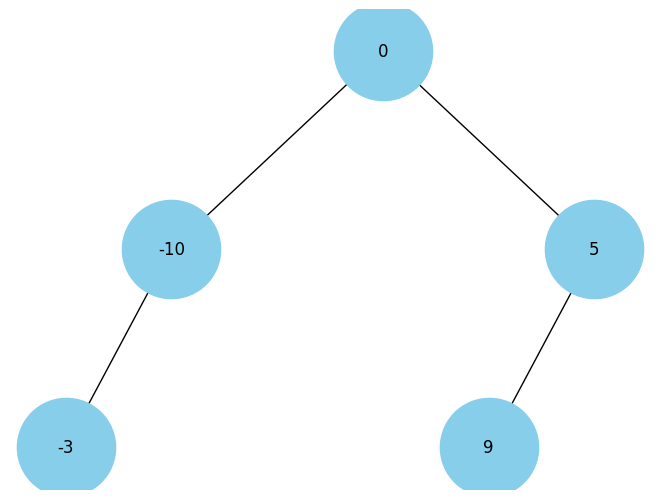



Sorted Array: [1, 2, 3, 4, 5, 6, 7]


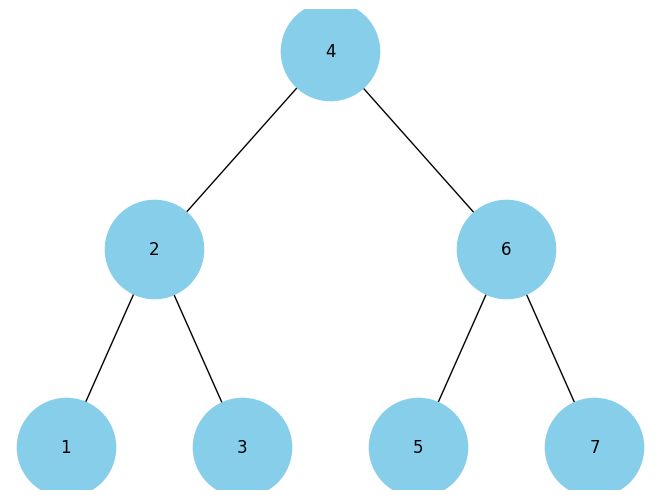



Sorted Array: []


Sorted Array: [15]


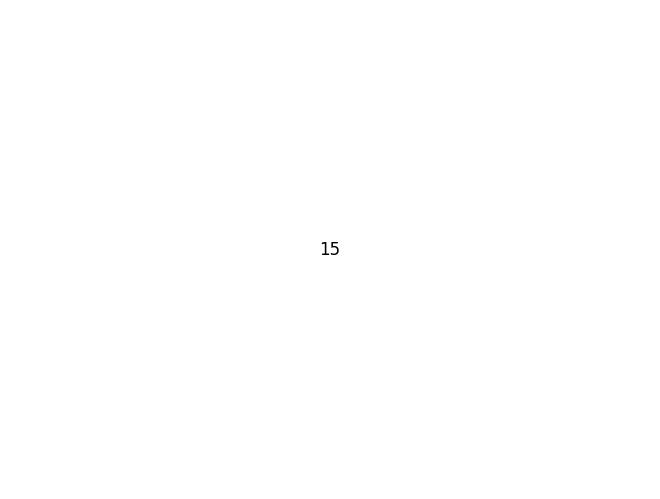



Sorted Array: [3, 5, 8, 20, 21]


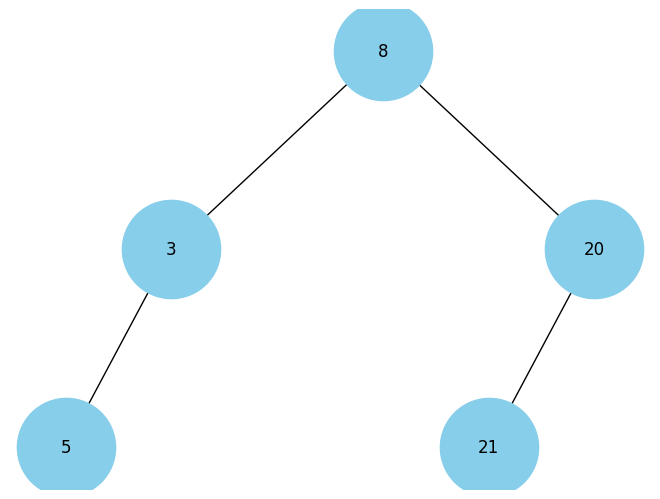



Sorted Array: [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 22, 33, 44, 55, 66]


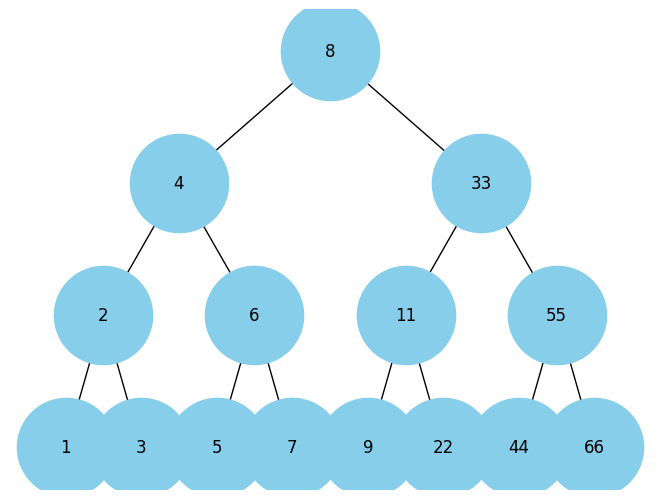

In [6]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque

class TreeNode:
    def __init__(self, x, id):
        self.id = id  # Unique identifier for each node
        self.val = x
        self.left = None
        self.right = None

def sortedArrayToBST(nums):
    def convertListToBST(left, right):
        if left > right:
            return None

        mid = (left + right) // 2
        node_id = f"{nums[mid]}-{mid}"  # Unique id combining value and index
        node = TreeNode(nums[mid], node_id)

        node.left = convertListToBST(left, mid - 1)
        node.right = convertListToBST(mid + 1, right)
        return node

    return convertListToBST(0, len(nums) - 1)

def hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):
    """
    From Joel's answer at https://stackoverflow.com/a/29597209/2966723.
    Licensed under Creative Commons Attribution-Share Alike

    If the graph is a tree this will return the positions to plot this in a
    hierarchical layout.

    G: the graph (must be a tree)
    root: the root node of current branch
    width: horizontal space allocated for this branch - avoids overlap with other branches
    vert_gap: gap between levels of hierarchy
    vert_loc: vertical location of root
    xcenter: horizontal location of root
    """
    pos = {root: (xcenter, vert_loc)}
    children = list(G.neighbors(root))
    if len(children)!=0:
        dx = width / 2
        nextx = xcenter - width/2 - dx/2
        for child in children:
            nextx += dx
            pos.update(hierarchy_pos(G, child, width=dx, vert_gap=vert_gap,
                                    vert_loc=vert_loc-vert_gap, xcenter=nextx))
    return pos

def plot_tree_corrected(root):
    if not root:
        return

    G = nx.DiGraph()
    nodes = deque([root])
    labels = dict()

    while nodes:
        node = nodes.popleft()
        labels[node.id] = node.val

        if node.left:
            G.add_edge(node.id, node.left.id)
            nodes.append(node.left)

        if node.right:
            G.add_edge(node.id, node.right.id)
            nodes.append(node.right)

    if len(G) > 1:
        pos = hierarchy_pos(G, root.id)
    else:
        pos = {root.id: (0.5, 0.5)}  # Position for single node

    nx.draw(G, pos, labels=labels, with_labels=True, arrows=False, node_size=5000, node_color="skyblue")
    plt.show()

# Test cases
test_arrays = [
    [-10, -3, 0, 5, 9],
    [1, 2, 3, 4, 5, 6, 7],
    [],
    [15],
    [3, 5, 8, 20, 21],
    [1,2,3,4,5,6,7,8,9,11,22,33,44,55,66]
]


# Testing with corrected plotting method for all scenarios including single element arrays
for arr in test_arrays:
    print(f"Sorted Array: {arr}")
    root = sortedArrayToBST(arr)
    plot_tree_corrected(root)
    print("\n" + "="*50 + "\n")